<a href="https://colab.research.google.com/github/amikoshimrah/Deployment/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pymysql library and load data
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    con = pymysql.connect(
        host ='127.0.0.1',
        user ='root',
        password ='Mysql@2025',
        port = 3306
    )
     #load data
    query = "select * from cars.car_price_dataset"
    df= pd.read_sql(query,con)
    print('Successfully Connected')
    display(df.head())
except pymysql.error as e:
    print(f"sqlerror: {e}")
finally:
    if 'con' in locals():
        con.close()
        print('Connection closed successfully')



Successfully Connected


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


Connection closed successfully


In [ ]:
#Basic info
print(df.info())
#print(df.shape)
#print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None


# Exploratory Data Analysis (EDA):
● Identify missing values, outliers, and duplicates.
● Use summary statistics and feature analysis.
● Generate insights from distribution and relationship among variables.

In [ ]:
print(df.isna().sum())
print(df.duplicated().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64
0


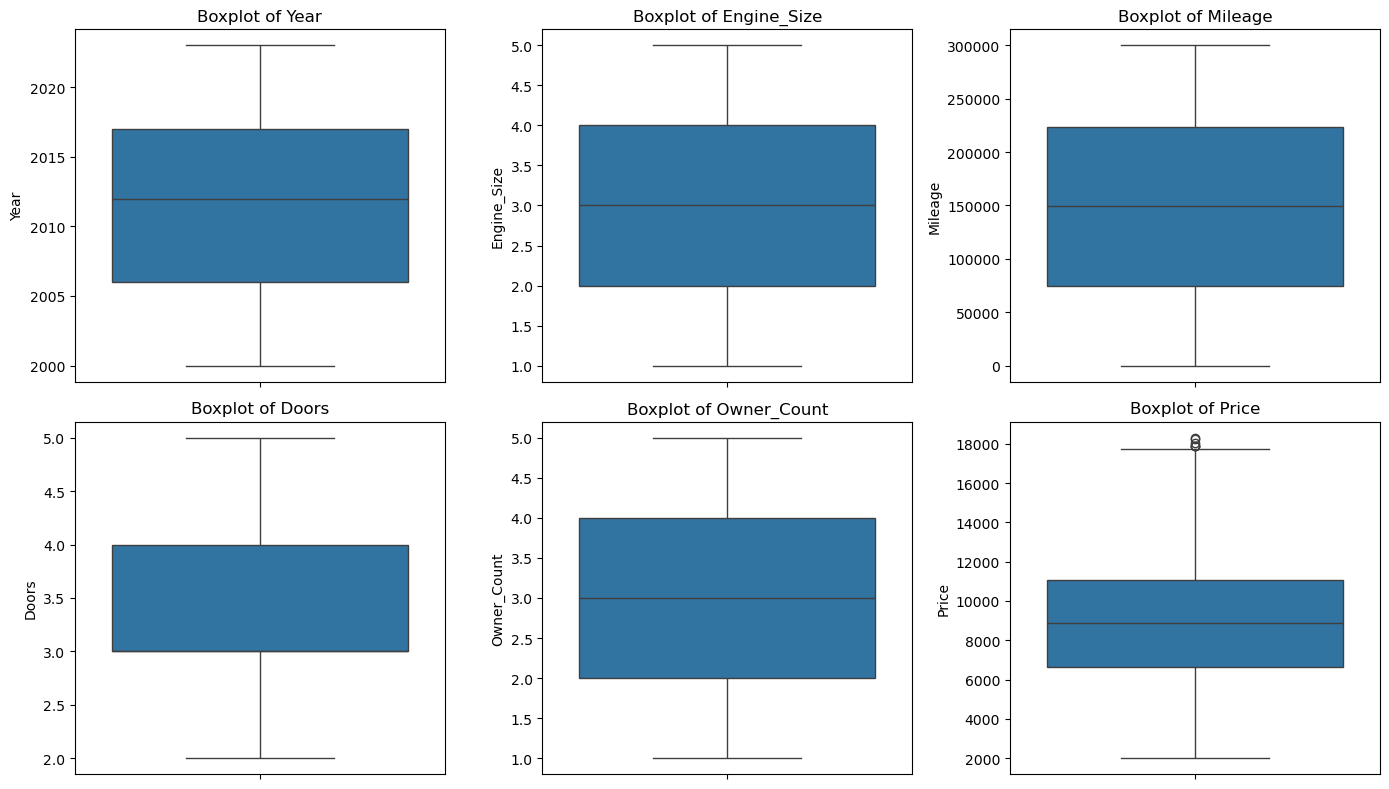

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numerical columns
num_cols = df.select_dtypes(include='number').columns

# Plot boxplots for each numerical column
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols) + 1) // 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# No Outliers except for few prices however since price for each model is different we can ignore

In [ ]:
# Display summary statistics for numeric columns
print(df.describe())

# Show summary for categorical columns
print(df.describe(include=['object']))

               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  
        Brand   Model Fuel_Type Transmission
count   10000   10000     10000        10000


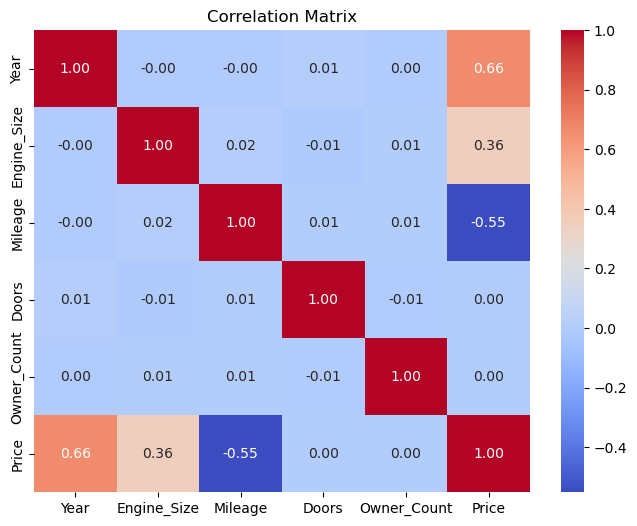

In [ ]:
# Correlation matrix
# Select numeric columns only
numeric_df = df.select_dtypes(include='number')
# Compute correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


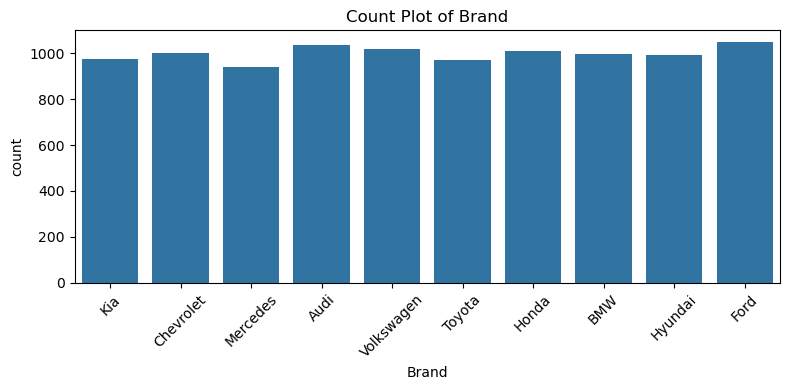

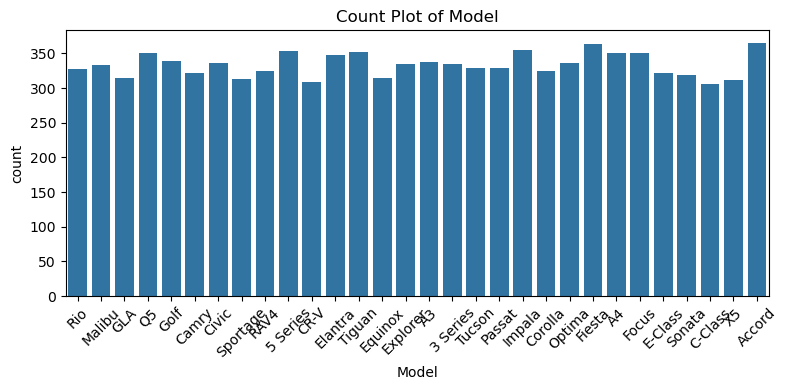

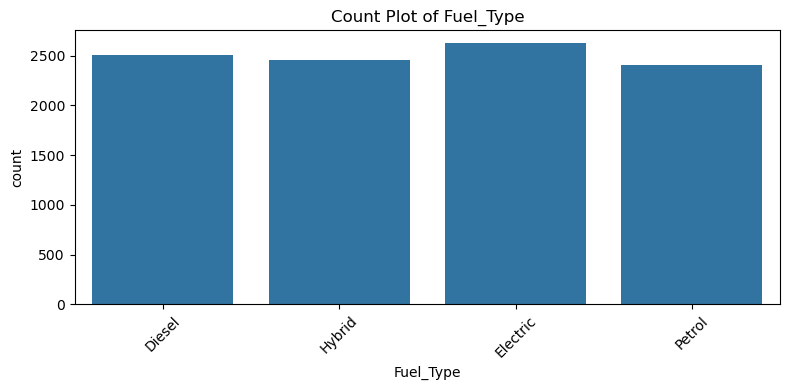

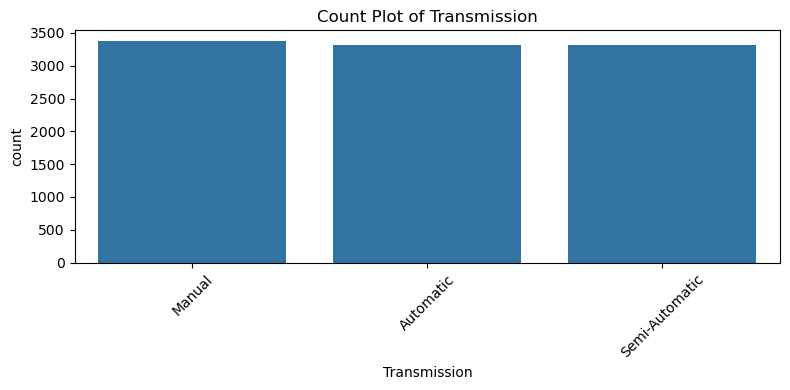

In [ ]:
# Generate count plots for each categorical column
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Split features and target
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

In [ ]:
# Preprocessing for categorical data
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [ ]:
# Pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Model',
                                                   'Fuel_Type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Predict
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 336.09
R² Score: 0.9877


In [ ]:
# Save only the classifier
import joblib
joblib.dump(pipeline, "car_price_regressor_v2.pkl",compress=3)


['car_price_regressor_v2.pkl']